In [64]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs

In [65]:
X1,y1 = make_blobs(n_samples = 50,centers = [[4,4],[-2,-1],[1,1],[10,4]],cluster_std = 0.9)

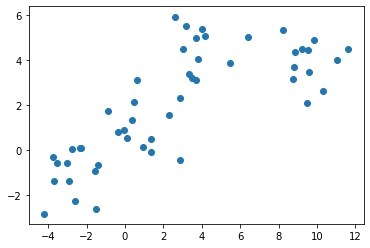

In [66]:
plt.scatter(X1[:,0],X1[:,1],marker = 'o')

In [67]:
agglom = AgglomerativeClustering(n_clusters = 4,linkage = 'average')

In [68]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='average', memory=None,
            n_clusters=4, pooling_func='deprecated')

In [69]:
agglom.labels_

array([1, 0, 3, 3, 2, 0, 1, 2, 0, 1, 1, 3, 3, 1, 1, 3, 3, 0, 3, 2, 3, 0,
       1, 3, 1, 3, 0, 1, 1, 0, 2, 2, 1, 0, 0, 2, 0, 0, 3, 1, 2, 2, 2, 2,
       3, 2, 3, 1, 2, 1])

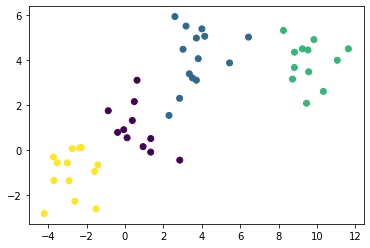

In [70]:
plt.scatter(X1[:,0],X1[:,1],c = agglom.labels_)

In [71]:
from scipy.cluster.hierarchy import dendrogram, linkage
linked = linkage(X1,'complete')

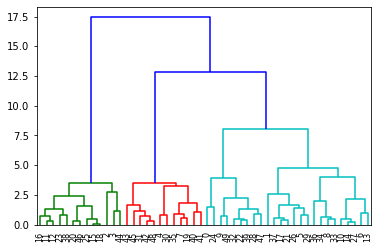

In [72]:
dendrogram(linked)
plt.show()

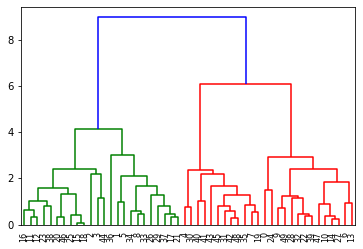

In [73]:
from scipy.cluster.hierarchy import linkage,dendrogram
linked = linkage(X1,'average')
dendrogram(linked)
plt.show()

In [74]:
!wget -O cars_clus.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv

--2020-02-25 12:46:19--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/cars_clus.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17774 (17K) [text/csv]
Saving to: ‘cars_clus.csv’

cars_clus.csv       100%[===================>]  17.36K  --.-KB/s    in 0.02s   

2020-02-25 12:46:19 (848 KB/s) - ‘cars_clus.csv’ saved [17774/17774]



In [75]:
filename = 'cars_clus.csv'
pdf = pd.read_csv(filename)
pdf

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,Volvo,V70,17.531,$null$,0.000,28.800,2.400,168.000,104.900,69.300,186.200,3.259,17.900,25.000,2.864,0.0
155,Volvo,C70,3.493,$null$,0.000,45.500,2.300,236.000,104.900,71.500,185.700,3.601,18.500,23.000,1.251,0.0
156,Volvo,S80,18.969,$null$,0.000,36.000,2.900,201.000,109.900,72.100,189.800,3.600,21.100,24.000,2.943,0.0
157,NaN,newCar,$null$,$null$,$null$,21.500,1.500,76.000,106.300,67.900,175.000,2.932,11.900,46.000,$null$,1.0


In [76]:
pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition']] = pdf[['sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales', 'partition']].apply(pd.to_numeric,errors = 'coerce')

In [77]:
pdf.dropna(inplace = True)

In [78]:
pdf = pdf.reset_index(drop = True)

In [79]:
featureset = pdf[['engine_s','horsepow','wheelbas','width','length','curb_wgt','fuel_cap','mpg']]

In [80]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
featureset = mms.fit_transform(featureset)

In [85]:
from scipy.cluster.hierarchy import linkage,dendrogram
from scipy.spatial import distance_matrix

In [90]:
from sklearn.cluster import AgglomerativeClustering
agglom = AgglomerativeClustering(n_clusters = 7,linkage = 'complete')

In [91]:
agglom.fit_predict(featureset)

array([0, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 2, 0, 0, 2, 2, 2, 5, 0,
       4, 0, 0, 2, 0, 2, 0, 0, 0, 5, 6, 3, 3, 1, 2, 0, 2, 0, 2, 1, 2, 1,
       3, 1, 6, 0, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 2, 2, 2, 1, 1, 1, 0, 0,
       0, 2, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 5, 0, 0, 2, 1, 2, 0, 1,
       2, 1, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       2, 3, 0, 0, 0, 0, 0])

In [93]:
pdf['clusters'] = agglom.fit_predict(featureset)

In [116]:
labels = pdf['manufact'].values
labels

array(['Acura', 'Acura', 'Acura', 'Audi', 'Audi', 'Audi', 'BMW', 'BMW',
       'Buick', 'Buick', 'Buick', 'Buick', 'Cadillac', 'Cadillac',
       'Cadillac', 'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet',
       'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chevrolet', 'Chrysler',
       'Chrysler', 'Chrysler', 'Chrysler', 'Chrysler', 'Dodge', 'Dodge',
       'Dodge', 'Dodge', 'Dodge', 'Dodge', 'Dodge', 'Dodge', 'Dodge',
       'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford', 'Ford',
       'Ford', 'Ford', 'Honda', 'Honda', 'Honda', 'Honda', 'Honda',
       'Hyundai', 'Hyundai', 'Hyundai', 'Infiniti', 'Jeep', 'Jeep',
       'Jeep', 'Lexus', 'Lexus', 'Lexus', 'Lincoln', 'Lincoln',
       'Mitsubishi', 'Mitsubishi', 'Mitsubishi', 'Mitsubishi',
       'Mitsubishi', 'Mitsubishi', 'Mitsubishi', 'Mercury', 'Mercury',
       'Mercury', 'Mercury', 'Mercury', 'Mercury', 'Mercedes-Benz',
       'Mercedes-Benz', 'Mercedes-Benz', 'Mercedes-Benz', 'Nissan',
       'Nissan', 'Nissan', 'Nissan'

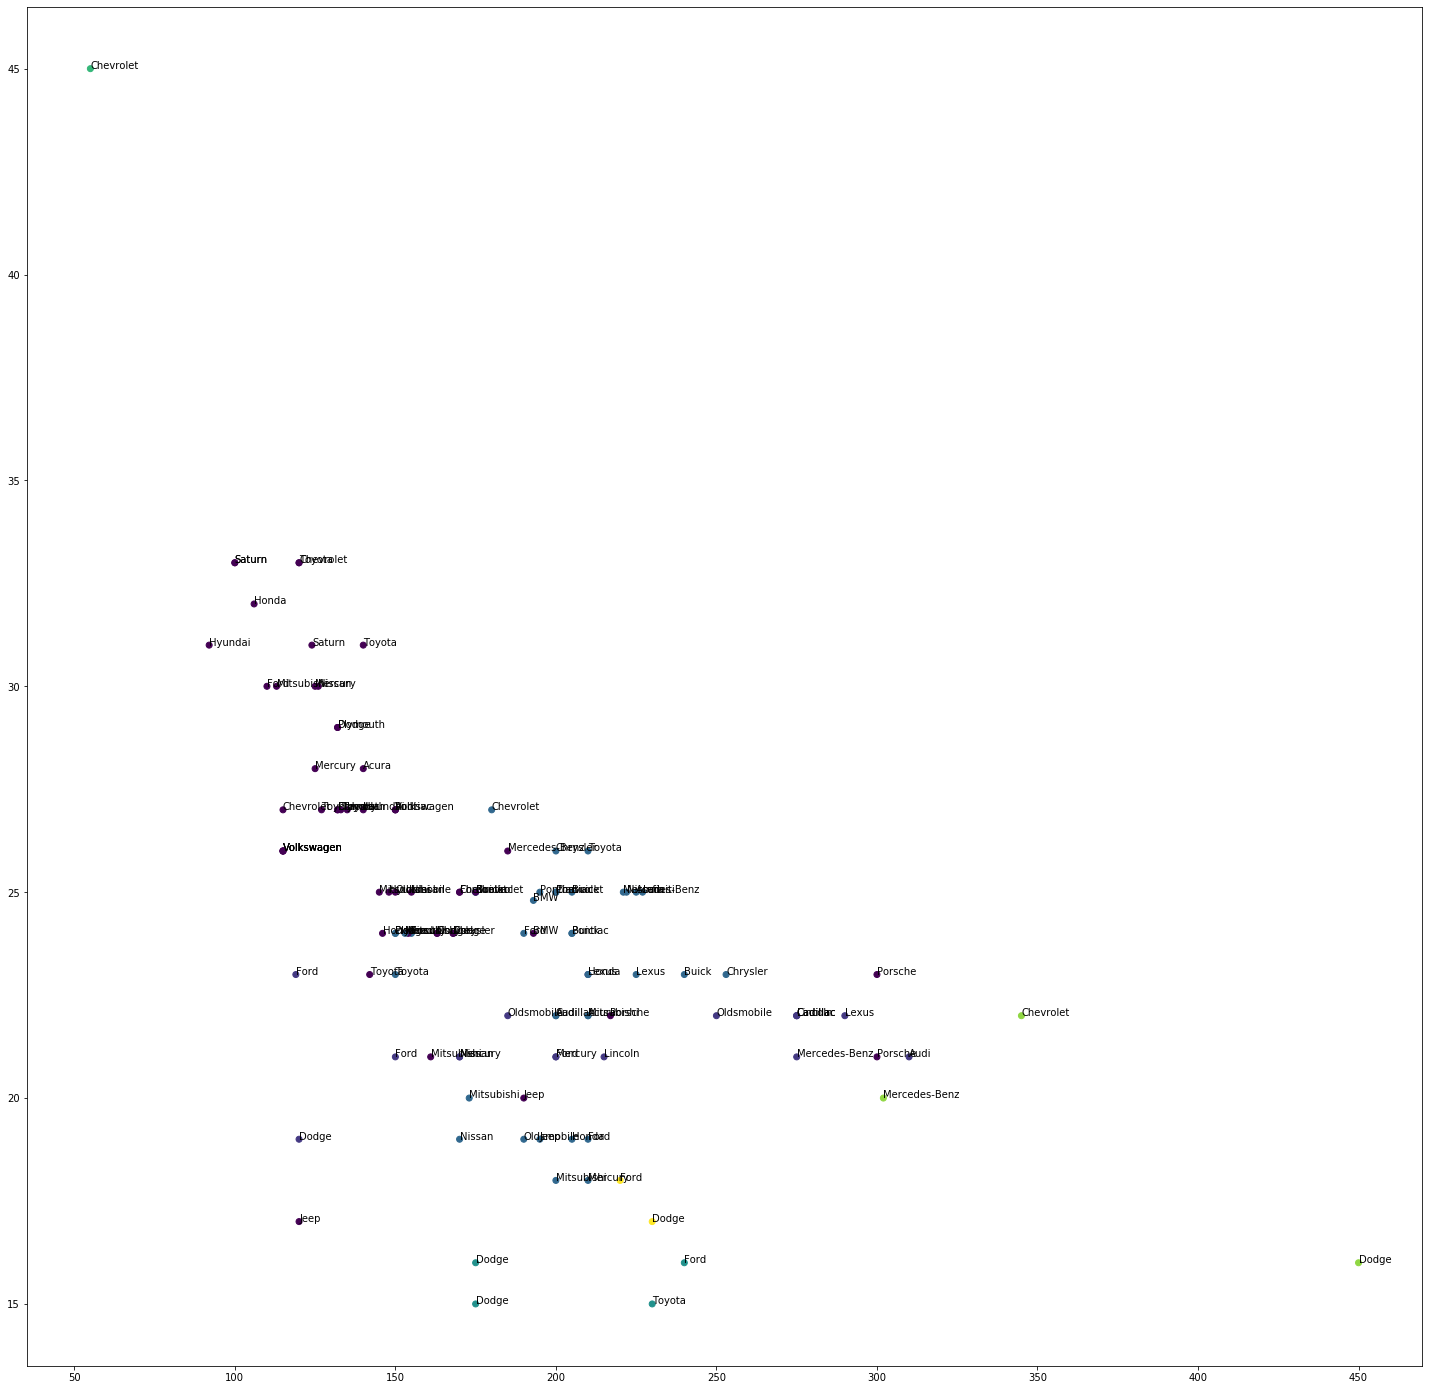

In [117]:
plt.figure(figsize = (25,25))
plt.scatter(x = pdf['horsepow'],y = pdf['mpg'],c = pdf['clusters'])
for labels,x,y in zip(labels,pdf['horsepow'],pdf['mpg']):
    plt.annotate(
        labels,
        xy = (x,y)
    )
    

In [128]:
pdf.groupby(['clusters','type'])['clusters'].count()

clusters  type
0         0.0     47
          1.0      5
1         0.0     10
          1.0      7
2         0.0     27
          1.0     11
3         1.0      4
4         0.0      1
5         0.0      3
6         1.0      2
Name: clusters, dtype: int64

In [135]:
dataframe = pdf.groupby(['clusters','type'])[['horsepow','engine_s','mpg','price']].mean()

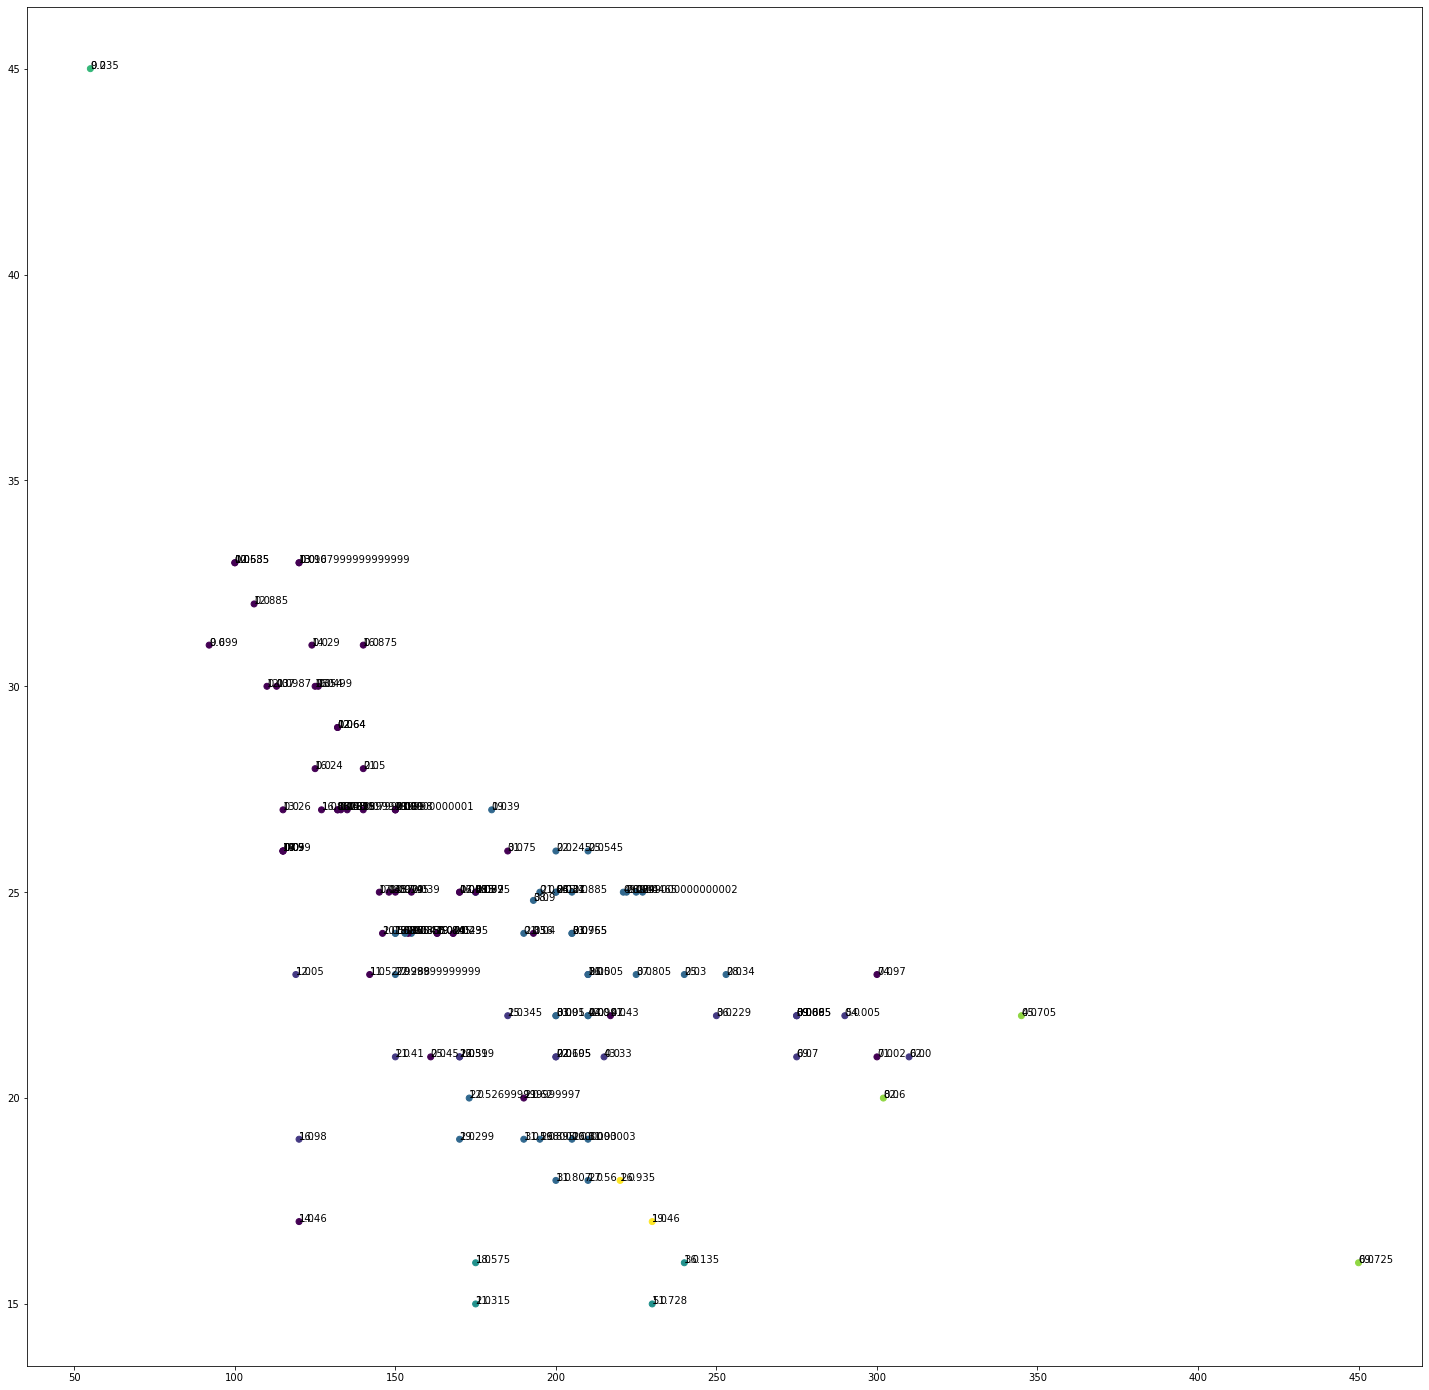

In [147]:
plt.figure(figsize = (25,25))

plt.scatter(pdf['horsepow'],pdf['mpg'],c = pdf['clusters'])
labels = pdf['type'].values
for labels,x,y in zip(labels,pdf['horsepow'],pdf['mpg']):
    plt.annotate(
        labels,
        xy = (x,y)
    )
    
labels2 = pdf['price'].values
for labels2,x,y in zip(labels2,pdf['horsepow'],pdf['mpg']):
    plt.annotate(
        labels2,
        xy = (x,y)
    )


In [143]:
pdf

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,clusters
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,Volkswagen,Golf,9.761,11.425,0.0,14.90,2.0,115.0,98.9,68.3,163.3,2.767,14.5,26.0,2.278,0.0,0
113,Volkswagen,Jetta,83.721,13.240,0.0,16.70,2.0,115.0,98.9,68.3,172.3,2.853,14.5,26.0,4.427,0.0,0
114,Volkswagen,Passat,51.102,16.725,0.0,21.20,1.8,150.0,106.4,68.5,184.1,3.043,16.4,27.0,3.934,0.0,0
115,Volkswagen,Cabrio,9.569,16.575,0.0,19.99,2.0,115.0,97.4,66.7,160.4,3.079,13.7,26.0,2.259,0.0,0
